In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [253]:
# Load data
df = pd.read_csv('pola_tidur_mahasiswa.csv')

# Standarisasi fitur
X = df[['Jam Tidur', 'Durasi Tidur', 'Kualitas Tidur']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [254]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [255]:
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Kurang Tidur'
    elif row['Cluster'] == 1:
        return 'Tidur Sehat'
    elif row['Cluster'] == 2:
        return 'Tidur Malam'

df['Label Tidur'] = df.apply(label_cluster, axis=1)

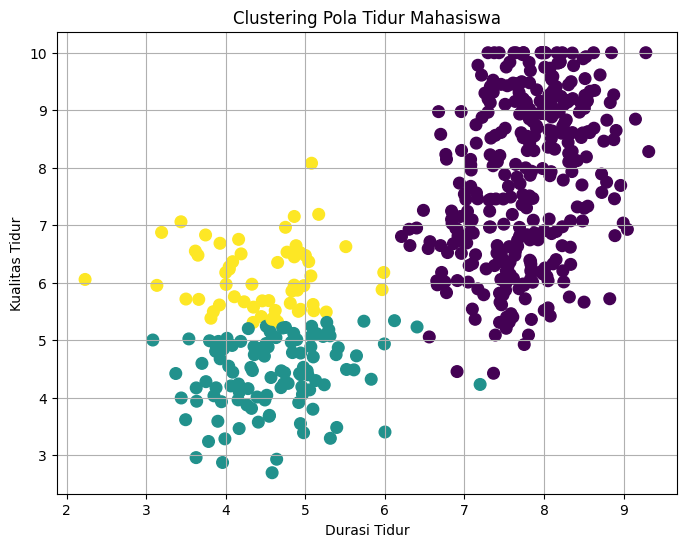

In [256]:
# Visualisasi 
plt.figure(figsize=(8,6))
plt.scatter (df['Durasi Tidur'], df['Kualitas Tidur'], c=df['Cluster'], cmap='viridis', s=70)
plt.xlabel('Durasi Tidur')
plt.ylabel('Kualitas Tidur')
plt.title('Clustering Pola Tidur Mahasiswa')
plt.grid(True)
plt.show()